Suicide and Depression Detection
The dataset is a collection of posts from "SuicideWatch" and "depression" subreddits of the Reddit platform. The posts are collected using Pushshift API. All posts that were made to "SuicideWatch" from Dec 16, 2008(creation) till Jan 2, 2021, were collected while "depression" posts were collected from Jan 1, 2009, to Jan 2, 2021.

It's worth noting that working with datasets related to mental health can be sensitive and challenging, as it involves handling personal and potentially sensitive information. It's important to approach this data with care and respect, and to ensure that any research or analysis is conducted in an ethical and responsible manner.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import string

# Text Processing libraries
import nltk
from nltk.stem import PorterStemmer

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_file ='/content/drive/My Drive/Colab Notebooks/Suicide_Detection.csv'

In [ ]:
data = pd.read_csv(path_to_file)
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


# **DATA PROCESSING**

In [ ]:
data.shape

(232074, 3)

The given dataset contain more than 2 lakh rows.

It takes take significant time and resources, as it involves optimizing the parameters of the model and processing the data iteratively.

So I will take 10000 data points which will help to reduce complexity.




In [ ]:
df = data.sample(n=10000, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 74414 to 224640
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [ ]:
df['Unnamed: 0'].is_unique

True

In [ ]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [ ]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# **Data Visualisation**

non-suicide    5048
suicide        4952
Name: class, dtype: int64


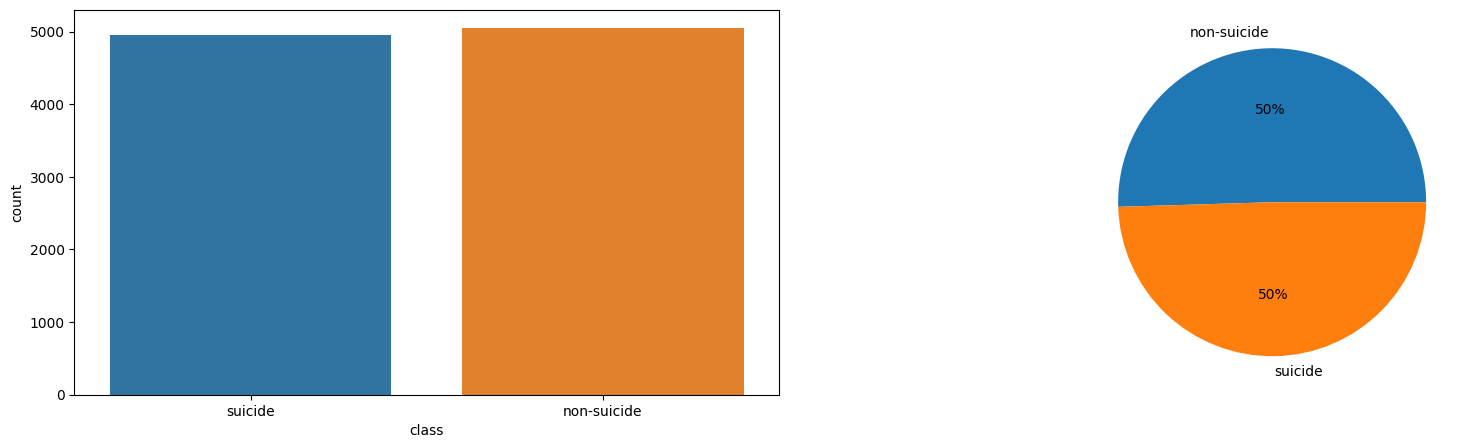

In [ ]:
classCnt = df['class'].value_counts()
print(classCnt)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,1)
sns.countplot(df,x='class')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

# **Text Preprocessing**

Lowering the Text

Changing the case involves converting all text to lowercase or uppercase so that all word strings follow a consistent format.

Lowercasing is the more frequent choice in NLP software

In [ ]:
df['text']= df['text'].str.lower()

# **Remove Punctuations**

Text preprocessing involves various techniques to clean and transform raw text data into a more suitable format for analysis.

Removing punctuation is one of the most commonly used preprocessing techniques, as punctuation marks do not usually add much semantic value to the text and can interfere with downstream NLP tasks.

String library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[]^_`{|}~’

In [ ]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

# **Stop word removal**

Stopwords are the most commonly occurring words in a language, such as "the", "and", "a", "an", "in", "to", etc.

These words have very little semantic value and are often used to connect meaningful words in a sentence.

In many natural language processing (NLP) tasks, stopwords can be removed without affecting the meaning of the text, and doing so can actually improve the performance of the NLP models.



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Tokenization**

The tokenization stage involves converting a sentence into a stream of words, also called “tokens.”

Tokens are usually words, but they can also be phrases, symbols, or other meaningful units of text.

In [ ]:
import nltk
nltk.download('punkt')
df['text'] = df['text'].apply(lambda x: str(x))

df['text'] = df['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Stemming**

The term word stem is borrowed from linguistics and used to refer to the base or root form of a word.

Stemming is the process of converting all words to their base form, or stem.

In [ ]:
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [ ]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [ ]:
df.head()

,text,class
74414,dont know7 month self harm free urg get strong...,suicide
149516,start becom rich start compani becom 16 afford...,non-suicide
12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
14043,ive honestli got idea anymoreit feel everyon f...,suicide
30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [ ]:
# Saved the cleaned dataset.
df.to_csv('file1.csv')

In [ ]:
dfnew = pd.read_csv('file1.csv')
dfnew.head()

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [ ]:
dfnew.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
ind = dfnew[dfnew['text'].isnull()].index

In [ ]:

df.iloc[ind]

,text,class
102482,,suicide


'text' column contains None values.

It may contain puctuations or emojies.

So I am going to drop that rows

In [ ]:
dfnew.dropna(inplace=True)

# **Machine Learning - Model Selection**

In [ ]:
x,y = dfnew['text'],dfnew['class']

# **TF-IDF Vectorizer**

In [ ]:
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [ ]:
# Save the model
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [ ]:
X_train.shape,X_test.shape

((6999, 1320), (3000, 1320))

# **Naive Bayes (Voting Classifier)**

In [ ]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.899271324474925
Testing score: 0.8753333333333333


              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88      1542
     suicide       0.87      0.87      0.87      1458

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



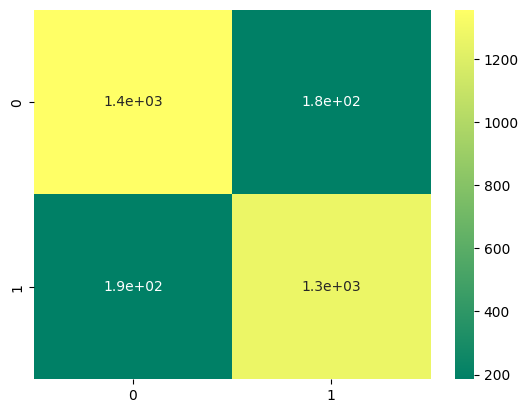

In [ ]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

# **Random Forest**

In [ ]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(X_train, y_train)
print('Training score:',classifiers.score(X_train, y_train))
print('Testing score:',classifiers.score(X_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.7539648521217317
Testing score: 0.7486666666666667
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       n_estimators=4)


              precision    recall  f1-score   support

 non-suicide       0.71      0.86      0.78      1542
     suicide       0.81      0.64      0.71      1458

    accuracy                           0.75      3000
   macro avg       0.76      0.75      0.74      3000
weighted avg       0.76      0.75      0.75      3000



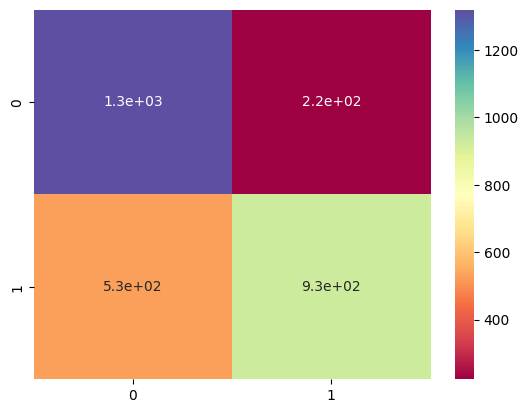

In [ ]:
y_act=y_test
y_pred=classifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

# **Decision Tree**

In [ ]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test,y_test))

0.7485355050721532
0.7526666666666667


              precision    recall  f1-score   support

 non-suicide       0.74      0.80      0.77      1542
     suicide       0.77      0.70      0.73      1458

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



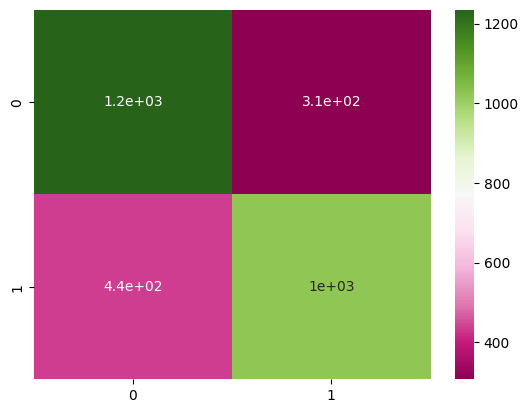

In [ ]:
y_act=y_test
y_pred=model2.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

# **Conclusion**
From the above we can say that out of all models, Naive Bayes (Voting Classifier) is best fit model for the dataset.

Training score: 0.899271324474925

Testing score: 0.8753333333333333

In [ ]:
# save the Model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(VotingClassifiers, f)

In [ ]:
def preprocess(inp):
    inp = inp.lower() #convert to lower case
    inp = inp.replace(r'[^\w\s]+', '') #remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)] #tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp]) #stremming
    inputToModel = vectorizer.transform([inp]).toarray() #transform to vector form
    return inputToModel

In [ ]:
def app(input_text):
    # Define the input text box
    print('Input : ',input_text) #take input from user
    processed_array = preprocess(input_text) #preprocess the text
    predict = VotingClassifiers.predict(processed_array) #Model prediction
    print('Output : ', predict[0])

In [ ]:
app('i am tired of my life i want to end my life')

Input :  i am tired of my life i want to end my life
Output :  suicide


In [ ]:
app('Have a nice day! Happy Coding😊')

Input :  Have a nice day! Happy Coding😊
Output :  non-suicide


In [ ]:
app('Feeling blankness... everything seems to be in fume...')

Input :  Feeling blankness... everything seems to be in fume...
Output :  suicide


In [ ]:
app('feeling nervous... but excited for new journey of life')

Input :  feeling nervous... but excited for new journey of life
Output :  non-suicide


In [ ]:
app('world seems to very bad but i am still enjoying...')

Input :  world seems to very bad but i am still enjoying...
Output :  suicide


In [ ]:
app('during presentation...my heart was pounding... but now i am so relaxed and happy')

Input :  during presentation...my heart was pounding... but now i am so relaxed and happy
Output :  non-suicide


In [ ]:
app('finally presentation got over... thank you everyone for time... it was lovely experience')

Input :  finally presentation got over... thank you everyone for time... it was lovely experience
Output :  non-suicide
